# Valuation of Diamonds
## Author : HoomanKaseban (Mr.Programmer)
### In this project, we are trying to predict the price of Diamonds with their information

# In this code, the Linear Regression method is used with the help of the SKlearn library
# The accuracy of the code is 90

## import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
import copy
import math
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder


### This File Contains the information of  Diamonds 
<ul>
    <li><b>Price :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Price of Diamonds (in K$)</i>
    </li>
    <li><b>carat :</b>
        <i style="color:red;font-family:arial;font-weight:bold">The Weight of Diamonds</i>
    </li>
    <li><b>Cut :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Quality of Diamonds Cut</i>
        <i style="color:blue;font-family:tahoma;font-weight:bold;font-size:9pt">
            <br >
            <q style="color:black;font-weight:bold">Fair,Good,VeryGood,Ideal,Premium(Excellent)</q> Description at Cut.Jpeg</i>
    </li>  
    <li><b>table :</b>
        <i style="color:red;font-family:arial;font-weight:bold"> A diamond's table refers to the flat facet of the diamond seen when the stone is face up.</i>
    </li>    
    <li><b>Clarity :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond clarity refers to how flawless a diamond is.more Description in Clarity.Jpeg</i>
    </li>
    <li><b>Depth :</b>
        <i style="color:red;font-family:arial;font-weight:bold">The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base.</i>
    </li>
    <li><b>Color :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Description in Color.Jpeg</i>
    </li>
    <li><b>X :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond on the X-axis</i>
    </li>
    <li><b>Y :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond on the Y-axis</i>
    </li>
    <li><b>Z :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond on the Z-axis</i>
    </li> 
</ul>

# Read The Csv

In [11]:
dataframe=pd.read_csv('/kaggle/input/diamonds-prices/Diamonds Prices2022.csv')
dataframe.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Deleting Useless Column

In [12]:
dataframe.drop('Unnamed: 0',inplace=True,axis=1)
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Get Some Information About Dataset

In [13]:
dataframe.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
dataframe.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Remove null rows (if any)

In [15]:
dataframe.dropna(inplace=True)
dataframe.shape

(53943, 10)

# Encoding

### Encoding with Map

In [16]:
dataframe['cut_encoded'] = dataframe['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
dataframe['color_encoded'] = dataframe['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
dataframe['clarity_encoded'] = dataframe['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

### Another type of Encoding (using encoder)

##### ordered_clarity=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
##### encoder=OrdinalEncoder(categories=[ordered_clarity])
##### dataframe['clarity_encoded']=encoder.fit_transform(dataframe.clarity.values.reshape(-1,1))

In [17]:
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,5,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1


# Check relation between columns to select

/tmp/ipykernel_32/52637984.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot = True, fmt = '.3f',


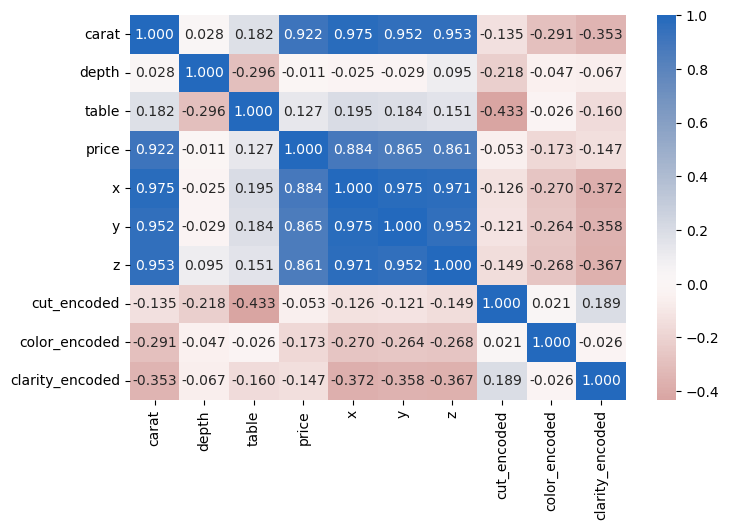

In [18]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(dataframe.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Create 'area' Column

In [19]:
dataframe['area']=dataframe['x']*dataframe['y']*dataframe['z']

In [20]:
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded,area
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,5,1,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1,51.917250


# Ploting

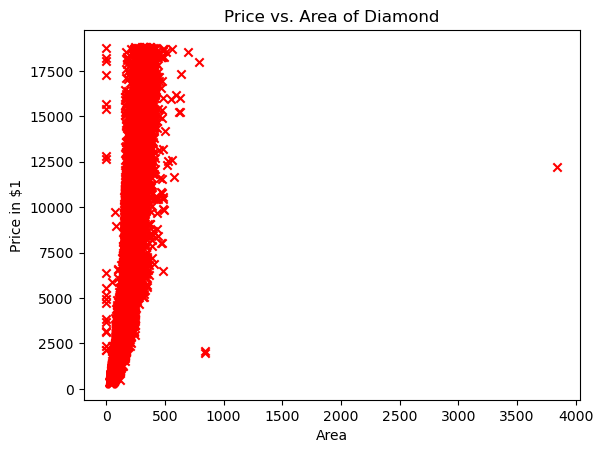

In [22]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(dataframe['area'], dataframe['price'], marker='x', c='r') 

# Set the title
plt.title("Price vs. Area of Diamond")
# Set the y-axis label
plt.ylabel('Price in $1')
# Set the x-axis label
plt.xlabel('Area')
plt.show()

# selecting features

In [23]:
df=dataframe[['clarity_encoded','color_encoded','area','carat','price']].copy()
df.head()

,clarity_encoded,color_encoded,area,carat,price
0,1,5,38.202030,0.23,326
1,2,5,34.505856,0.21,326
2,4,5,38.076885,0.23,327
3,3,1,46.724580,0.29,334
4,1,0,51.917250,0.31,335


In [24]:
#deleting outlier data
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

## Recheck PRICE-AREA PLOT

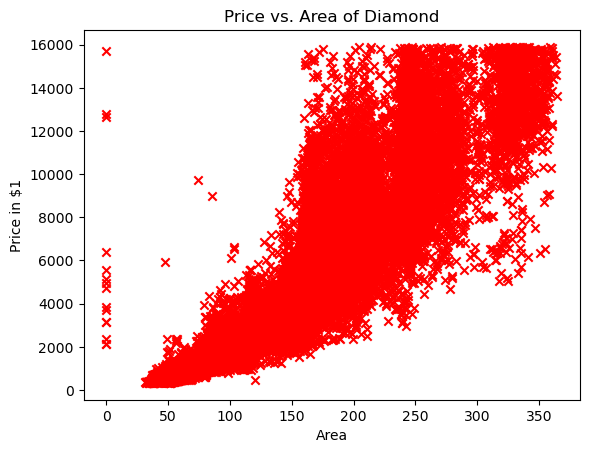

In [25]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(df['area'], df['price'], marker='x', c='r') 

# Set the title
plt.title("Price vs. Area of Diamond")
# Set the y-axis label
plt.ylabel('Price in $1')
# Set the x-axis label
plt.xlabel('Area')
plt.show()

## Check PRICE-CARAT Plot

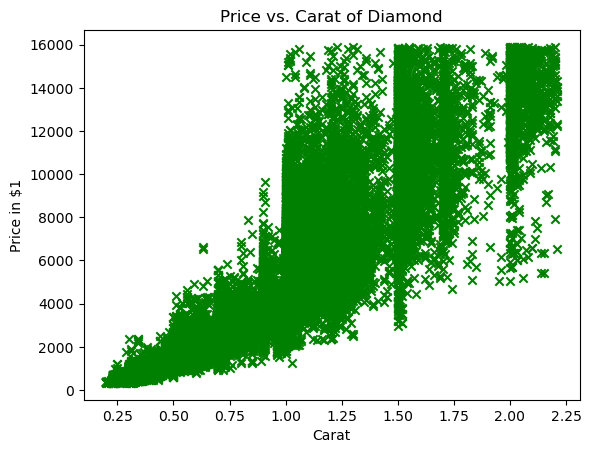

In [26]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(df['carat'], df['price'], marker='x', c='g') 

# Set the title
plt.title("Price vs. Carat of Diamond")
# Set the y-axis label
plt.ylabel('Price in $1')
# Set the x-axis label
plt.xlabel('Carat')
plt.show()

## Check new Correlation Plot

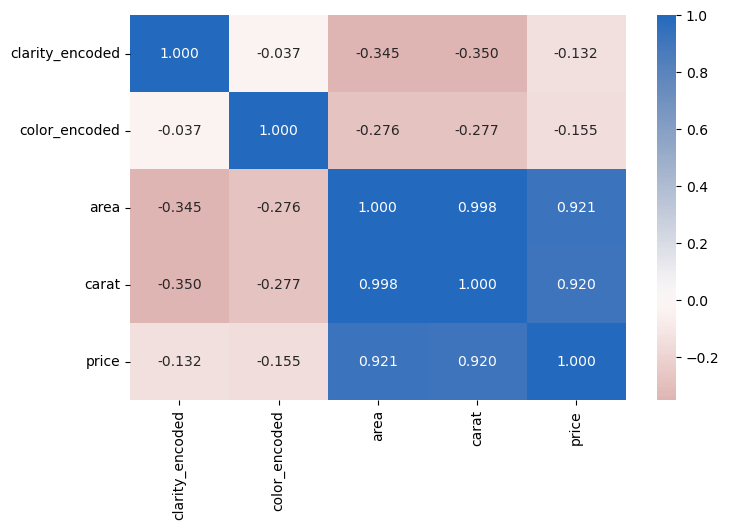

In [28]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [29]:
df.head()

,clarity_encoded,color_encoded,area,carat,price
0,1,5,38.202030,0.23,326
1,2,5,34.505856,0.21,326
2,4,5,38.076885,0.23,327
3,3,1,46.724580,0.29,334
4,1,0,51.917250,0.31,335


# Specify x , y

In [30]:
x_init=np.asanyarray(df[['area','carat','clarity_encoded','color_encoded']]).astype(float)
x_init

array([[ 38.20203 ,   0.23    ,   1.      ,   5.      ],
       [ 34.505856,   0.21    ,   2.      ,   5.      ],
       [ 38.076885,   0.23    ,   4.      ,   5.      ],
       ...,
       [115.988754,   0.71    ,   2.      ,   5.      ],
       [112.813386,   0.71    ,   2.      ,   4.      ],
       [114.126912,   0.7     ,   3.      ,   5.      ]])

In [31]:
y_init=np.asanyarray(df[['price']]).astype(float)
y_init

array([[ 326.],
       [ 326.],
       [ 327.],
       ...,
       [2756.],
       [2756.],
       [2757.]])

# Normalizing

In [32]:
scaler=StandardScaler()

In [35]:
norm_x=scaler.fit_transform(x_init)
norm_x

array([[-1.2513529 , -1.25249212, -1.25926053,  0.92594531],
       [-1.30515482, -1.29947414, -0.65145779,  0.92594531],
       [-1.25317452, -1.25249212,  0.5641477 ,  0.92594531],
       ...,
       [-0.11908057, -0.12492366, -0.65145779,  0.92594531],
       [-0.16530159, -0.12492366, -0.65145779,  0.33597309],
       [-0.14618175, -0.14841467, -0.04365504,  0.92594531]])

In [36]:
norm_y=scaler.fit_transform(y_init)
norm_y

array([[-0.9514953 ],
       [-0.9514953 ],
       [-0.9512037 ],
       ...,
       [-0.24291639],
       [-0.24291639],
       [-0.24262479]])

In [37]:
print(max(norm_y),min(norm_y))

[3.58924165] [-0.9514953]


# Create Mask

In [38]:
x_train,x_test,y_train,y_test=tts(norm_x,norm_y,train_size=0.78,random_state=5)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(40963, 4) (11554, 4) (40963, 1) (11554, 1)


# Modeling

In [39]:
model = LinearRegression().fit(x_train,y_train)

### Predict

In [40]:
model.predict(x_test)

array([[ 0.62235673],
       [ 0.74734688],
       [ 0.48926476],
       ...,
       [-0.97240445],
       [-0.93730055],
       [ 0.08952833]])

In [41]:
y_test

array([[ 0.63245558],
       [ 0.60212957],
       [ 0.25454683],
       ...,
       [-0.79753248],
       [-0.8421467 ],
       [-0.17293329]])

### Create Predicted Y

In [42]:
y_hat=model.predict(x_test)

In [44]:
print('The Score of Model:%.2f'% model.score(x_test,y_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))

The Score of Model:0.90
Mean absolute error: 0.22
Residual sum of squares (MSE): 0.09


# As we can see, the accuracy of the model is almost high
# (MAE and MSE is almost Low)

## Thank you for your support
## Author : HoomanKaseban
<a href='https://www.kaggle.com' target='_blank'>Dataset Source:kaggle</a>
### you can contact me through gmail,instagram,linkedin and github
#### Gmail:www.hoomankaseban@gmail.com
<ul>
<li><a href='https://www.instagram.com/hooman_kaseban' target='_blank'>my Instagram</a></li>
<li><a href='https://www.linkedin.com/in/hoomankaseban/' target='_blank'>my LinkedIn</a></li>
<li><a href='https://github.com/hoomankaseban' target='_blank'>my GitHub</a></li>
</ul>

#### Credit:All credits of this code are for Hooman Kaseban and are free for public use.
# The END